In [27]:
import numpy as np
import pandas as pd

import warnings
from matplotlib.colors import ListedColormap

warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics

In [28]:
novel_features = pd.read_csv("novel_features.csv", index_col = 0)
novel_features.head()

,Writer Name,Novel Name,Genre,Final Word Count,Daily Average,Winner,Synopses,url,Novel Date,Excerpt,...,num uniques,num sentences,paragraphs,fk score,has excerpt,num words excerpt,num uniques excerpt,num sentences excerpt,paragraphs excerpt,fk score excerpt
0,Nicaless,Novel: Lauren's Birthday,Young Adult,24229,807,0,\n<p></p>\n,http://nanowrimo.org/participants/nicaless/nov...,November 2015,\n<p></p>\n,...,0,0,0,0.00,0,0,0,0,0,0.00
1,Nicaless,Novel: A Mystery in the Kingdom of Aermon,Fantasy,50919,"1,697",1,\n<p>Hitoshi is appointed the youngest Judge a...,http://nanowrimo.org/participants/nicaless/nov...,November 2014,"\n<p>This story, funnily enough, started out a...",...,42,3,1,65.73,1,132,96,13,7,78.25
2,Rachel B. Moore,Novel: Finding Fortunato,Literary,50603,"1,686",1,\n<p>Sam and Anna Gold and their newly adoptiv...,http://nanowrimo.org/participants/rachel-b-moo...,November 2015,\n<p></p>\n,...,109,7,4,58.62,0,0,0,0,0,0.00
3,Rachel B. Moore,Novel: The Residency,Literary,50425,"1,680",1,\n<p>It's every writer's dream - an all-expens...,http://nanowrimo.org/participants/rachel-b-moo...,November 2014,\n<p></p>\n,...,51,4,3,65.73,0,0,0,0,0,0.00
4,Rachel B. Moore,Novel: The Jew From Fortunato,Literary Fiction,41447,"1,381",0,\n<p>20-something Andre Levinsky is a fish out...,http://nanowrimo.org/participants/rachel-b-moo...,November 2013,\n<p></p>\n,...,93,4,1,56.93,0,0,0,0,0,0.00


In [29]:
del novel_features['Novel Name']
del novel_features['Genre']
del novel_features['Final Word Count']
del novel_features['Daily Average']
del novel_features['Synopses']
del novel_features['url']
novel_features.head()

,Writer Name,Winner,Novel Date,Excerpt,has genre,standard genre,has_synopses,num words,num uniques,num sentences,paragraphs,fk score,has excerpt,num words excerpt,num uniques excerpt,num sentences excerpt,paragraphs excerpt,fk score excerpt
0,Nicaless,0,November 2015,\n<p></p>\n,1,1,0,0,0,0,0,0.00,0,0,0,0,0,0.00
1,Nicaless,1,November 2014,"\n<p>This story, funnily enough, started out a...",1,1,1,44,42,3,1,65.73,1,132,96,13,7,78.25
2,Rachel B. Moore,1,November 2015,\n<p></p>\n,1,1,1,153,109,7,4,58.62,0,0,0,0,0,0.00
3,Rachel B. Moore,1,November 2014,\n<p></p>\n,1,1,1,59,51,4,3,65.73,0,0,0,0,0,0.00
4,Rachel B. Moore,0,November 2013,\n<p></p>\n,1,0,1,124,93,4,1,56.93,0,0,0,0,0,0.00


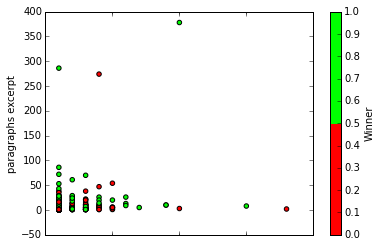

In [30]:
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
df = novel_features[novel_features['has_synopses'] == 1]
df = df[df['has excerpt'] == 1]
df.plot(kind='scatter', x='paragraphs', y='paragraphs excerpt', c='Winner', colormap = cmap_bold)

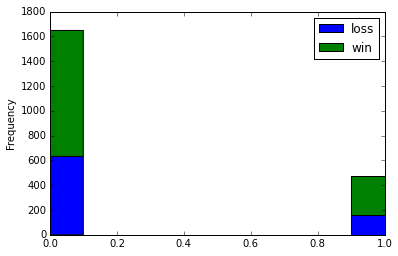

In [31]:
winlose = novel_features.groupby("Winner")
df = pd.DataFrame({'loss': winlose['has excerpt'].get_group(0), 'win': winlose['has excerpt'].get_group(1)})
df.plot(kind='hist', stacked=True)

In [32]:
excerpts = novel_features[novel_features['has excerpt'] == 0]
winners = len(excerpts[excerpts['Winner'] == 1])
nonwinners = len(excerpts[excerpts['Winner'] == 0])
print "The ratio of winners to nonwinners for those without excerpts is " + str( float(winners) / nonwinners)

The ratio of winners to nonwinners for those without excerpts is 1.60759493671


In [33]:
excerpts = novel_features[novel_features['has excerpt'] == 1]
winners = len(excerpts[excerpts['Winner'] == 1])
nonwinners = len(excerpts[excerpts['Winner'] == 0])
print "The ratio of winners to nonwinners for those with excerpts is " + str( float(winners) / nonwinners)

The ratio of winners to nonwinners for those with excerpts is 2.00632911392


In [34]:
synopsis = novel_features[novel_features['has_synopses'] == 0]
winners = len(synopsis[synopsis['Winner'] == 1])
nonwinners = len(synopsis[synopsis['Winner'] == 0])
print "The ratio of winners to nonwinners for those without synopses is " + str( float(winners) / nonwinners)

The ratio of winners to nonwinners for those without synopses is 1.52842809365


In [35]:
synopsis = novel_features[novel_features['has_synopses'] == 1]
winners = len(synopsis[synopsis['Winner'] == 1])
nonwinners = len(synopsis[synopsis['Winner'] == 0])
print "The ratio of winners to nonwinners for those with synopses is " + str( float(winners) / nonwinners)

The ratio of winners to nonwinners for those with synopses is 1.78411405295


In [66]:
test = novel_features[novel_features['Novel Date'] == "November 2015"]
train = novel_features[novel_features['Novel Date'] != "November 2015"]
print str(sum(test['Winner'] / float(len(test)))) + " is the fraction of winners in the test data"
print str(sum(train['Winner'] / float(len(train)))) + " is the fraction of winners in the train data"

0.437125748503 is the fraction of winners in the test data
0.686806411837 is the fraction of winners in the train data


In [67]:
del train['Writer Name']
del train['Novel Date']
del train['Excerpt']

del test['Writer Name']
del test['Novel Date']
del test['Excerpt']

In [68]:
#trainX = train[['has_synopses', 'has excerpt']].values
#trainy = train['Winner']
#testX = test[['has_synopses', 'has excerpt']].values
#testy = test['Winner']


In [69]:
train.head()

,Winner,has genre,standard genre,has_synopses,num words,num uniques,num sentences,paragraphs,fk score,has excerpt,num words excerpt,num uniques excerpt,num sentences excerpt,paragraphs excerpt,fk score excerpt
1,1,1,1,1,44,42,3,1,65.73,1,132,96,13,7,78.25
3,1,1,1,1,59,51,4,3,65.73,0,0,0,0,0,0.00
4,0,1,0,1,124,93,4,1,56.93,0,0,0,0,0,0.00
5,0,1,0,1,163,112,8,1,51.18,0,0,0,0,0,0.00
6,1,1,0,1,176,129,9,1,69.11,0,0,0,0,0,0.00


In [78]:
set(train['standard genre'])


{0, 1}

In [79]:
# create sparse matrix???? based on > mean (1) or < mean (0)
def Binarize(df): 
    for i in df:
        if len(set(df[i])) == 2:
            continue
        setmean = df[i].mean()
        std = df[i].std()
        df[i][df[i] < setmean + std] = 0
        df[i][df[i] >= setmean + std] = 1
    return df

train = Binarize(train)
train.head()


,Winner,has genre,standard genre,has_synopses,num words,num uniques,num sentences,paragraphs,fk score,has excerpt,num words excerpt,num uniques excerpt,num sentences excerpt,paragraphs excerpt,fk score excerpt
1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1
3,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
5,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0
6,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0


In [80]:
trainX = train
trainy = train['Winner']
del trainX['Winner']

testX = test
testy = test['Winner']
del testX['Winner']

In [81]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

cross_val_score(nb, trainX, trainy, cv=10).mean()

0.68680889859870908

In [84]:
from sklearn.svm import SVC

model = SVC(C=.01,kernel='rbf')
cross_val_score(model, trainX, trainy, cv = 10).mean()


0.68680889859870908

In [62]:
model_svc = SVC(C=1,kernel='rbf').fit(trainX,trainy)
print model_svc.score(testX, testy)
print classification_report(testy,model_svc.predict(testX))

0.437125748503
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       282
          1       0.44      1.00      0.61       219

avg / total       0.19      0.44      0.27       501

